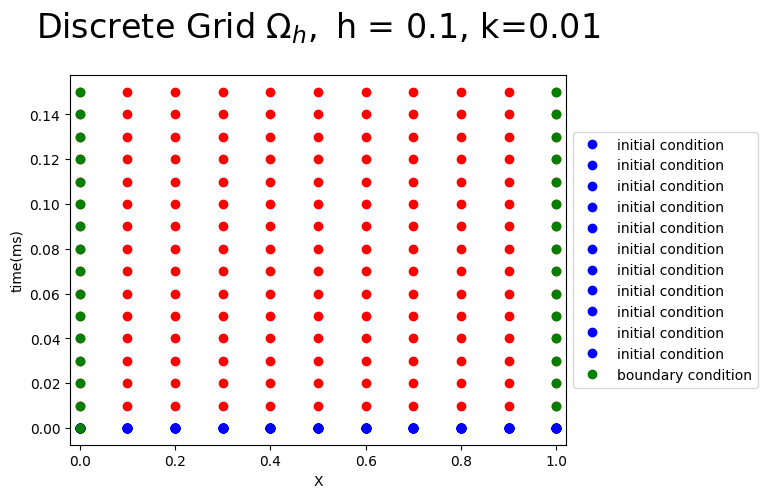

In [1]:
import numpy as np
import matplotlib.pyplot as plt


N = 10 #number of divisions in spatial direction 
Nt = 100 #number of divisions in time direction
h = 1/N #factor of each division in space
ht = 1/Nt #factor of each division in time 
r = ht/(h*h) #coefficient 
time_steps = 15 #number of time steps 
time = np.arange(0,(time_steps+0.5)*ht, ht)
X = np.arange(0,1.0001,h)
X,Y = np.meshgrid(X, time)
fig = plt.figure()
plt.plot(X,Y,'ro')
plt.plot(X,0*X,'bo', label='initial condition')
plt.plot(np.ones(time_steps+1), time, 'go', label='boundary condition')
plt.plot(X,0*X,'bo')
plt.plot(0*time, time, 'go')
plt.xlim((-0.02,1.02))
plt.xlabel('X')
plt.ylabel('time(ms)')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title(r'Discrete Grid $\Omega_h,$ h = %s, k=%s'%(h,ht), fontsize=24,y=1.08)
plt.show()

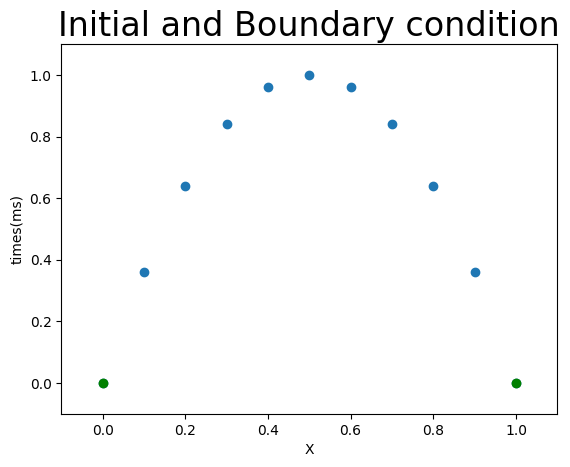

In [2]:
w = np.zeros((N+1, time_steps+1))
X = np.arange(0,1.0001,0.1)
b = np.zeros(N-1)
for i in range (1,N):
    w[i,0] = 4*X[i] - 4*X[i]*X[i] #initial conditions

for k in range(0, time_steps):
    w[0,k] = 0              #boundary conditions 
    w[N,k] = 0

fig = plt.figure()
plt.plot(X,w[:,0],'o', label='Initial Condition')
plt.plot(X[[0,N]],w[[0,N],0], 'go', label='Boundary condition at t=0')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Initial and Boundary condition', fontsize = 24)
plt.xlabel('X')
plt.ylabel('times(ms)')
plt.show()

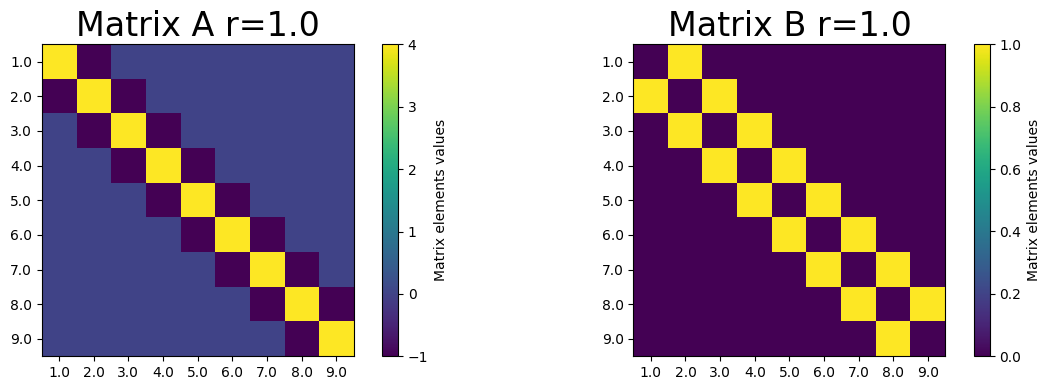

In [3]:
A = np.zeros((N-1, N-1))
B = np.zeros ((N-1, N-1))

for i in range (0,N-1):
    A[i,i] = 2+2*r 
    B[i,i] = 2-2*r
for i in range (0,N-2):
    A[i+1,i] = -r
    A[i,i+1] = -r
    B[i+1,i] = r
    B[i,i+1] = r
A_inv = np.linalg.inv(A)

fig = plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(A, interpolation='none')
plt.xticks(np.arange(N-1), np.arange(1,N-0.9,1))
plt.yticks(np.arange(N-1), np.arange(1,N-0.9,1))
clb=plt.colorbar()
clb.set_label('Matrix elements values')
plt.title('Matrix A r=%s'%(np.round(r,3)), fontsize=24)

plt.subplot(122)
plt.imshow(B, interpolation='none')
plt.xticks(np.arange(N-1), np.arange(1,N-0.9,1))
plt.yticks(np.arange(N-1), np.arange(1,N-0.9,1))
clb=plt.colorbar()
clb.set_label('Matrix elements values')
plt.title('Matrix B r=%s'%(np.round(r,3)), fontsize=24)

fig.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_6968\386815799.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


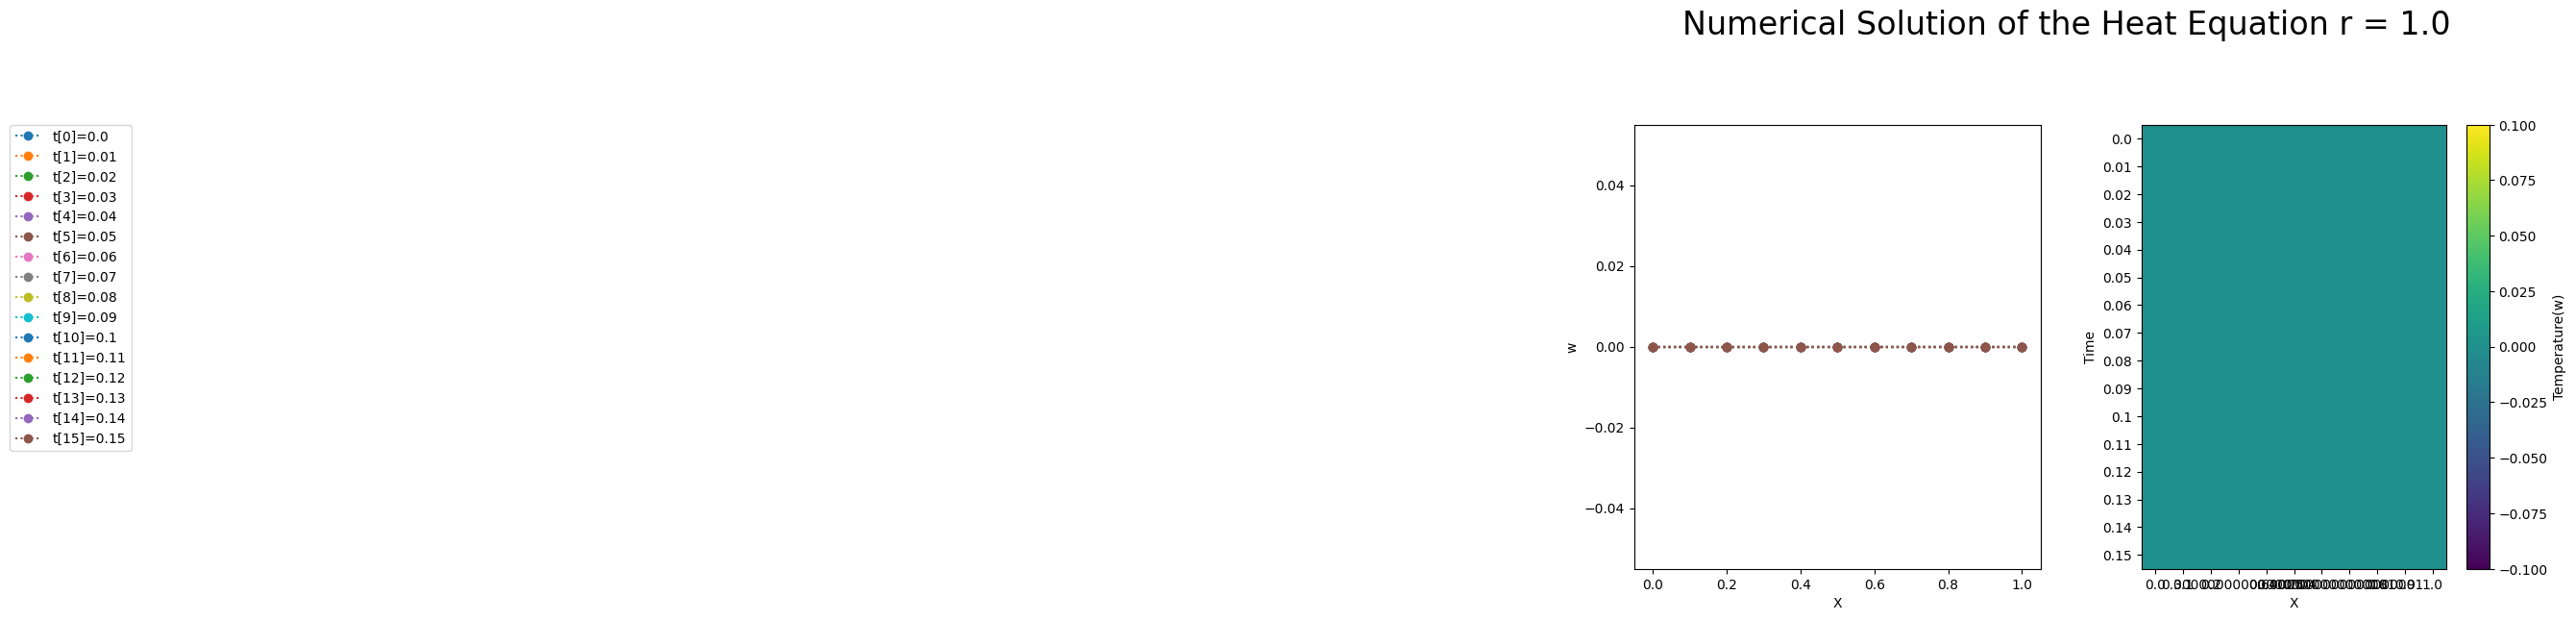

In [4]:
%matplotlib inline 

fig = plt.figure(figsize=(12,6))
plt.subplot(121)
for j in range (0, time_steps+1):
    b[0] = r*w[0,j-1]+r*w[0,j]
    b[N-2] = r*w[N,j-1]+r*w[N,j]
    v = np.dot(B,w[1:(N),j-1])
    w[1:(N),j] = np.dot(A_inv,v+b)
    plt.plot(X,w[:,j],'o:',label='t[%s]=%s'%(j,time[j]))
plt.xlabel('X')
plt.ylabel('w')
plt.legend(bbox_to_anchor=(-4,1), loc=2, borderaxespad=0.)

plt.subplot(122)
plt.imshow(w.transpose())
plt.xticks(np.arange(len(X)),X)
plt.yticks(np.arange(len(time)),time)
plt.xlabel('X')
plt.ylabel('Time')
clb=plt.colorbar()
clb.set_label('Temperature(w)')
plt.suptitle('Numerical Solution of the Heat Equation r = %s'%(np.round(r,3)), fontsize=24,y=1.08)
fig.tight_layout()
plt.show()